In [2]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import seaborn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Null Hypothesis:
The average trip duration for the for people older than 40 is same or longer than the average trip duration of the the people 40 years or younger.
Significance level: 0.05

$ H0: μ_1 >= μ_2 $

where,

    μ1 : mean of trip duration of people older than 40
    μ2 : mean of trip duration of people younger or equal to 40

### Alternate Hypothesis:
The average trip duration for people older than 40 is smaller than the average trip duration of the people 40 years or younger.

$ H1: μ_1 < μ_2 $

In [3]:
os.environ["PUIDATA"] = '/home/urwa/PUI/PUIData'

In [14]:
### A function to download the data: simple bash commands can be run by preceding them with !
### but more complex command lines with variable arguments need to be build as strng and run with os.system
### this code cell does a lot of things: looks for existing files, download a file if none is there, unzips it, moves it.
### you do not have to have a code cell this complicated. 
### As long as 
### 1) your research is reproducible: we can access the same file as you without having to ask you for the file
### 2) and your data is stored in a directory pointed to by the env variable PUIDATA 
### you will be fine. We already explored how to download data in other notebooks!

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [15]:
datestring = '201601'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
#datestring = '201601'
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
print('data points: '+str(len(df)))
df.head(2)

data points: 509478


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45


In [5]:
df.drop(['gender', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'date'], axis=1, inplace=True)

In [6]:
df.head()

,tripduration,birth year
0,923,1958.0
1,379,1969.0
2,589,1982.0
3,889,1961.0
4,1480,1952.0


In [7]:
df['age'] = 2016 - df['birth year']

In [8]:
df['Older than 40'] = df['age']>40
df.describe()

,tripduration,birth year,age
count,5.094780e+05,484933.000000,484933.000000
mean,8.472119e+02,1975.996863,40.003137
std,7.396954e+03,11.679123,11.679123
min,6.100000e+01,1885.000000,16.000000
25%,3.310000e+02,1968.000000,31.000000
50%,5.230000e+02,1978.000000,38.000000
75%,8.430000e+02,1985.000000,48.000000
max,1.960017e+06,2000.000000,131.000000


In [9]:
print('Old people sample size:  '+str(df['Older than 40'].sum()))
print('Young people sample size:  '+str(len(df)-df['Older than 40'].sum()))

Old people sample size:  209769
Young people sample size:  299709


In [10]:
df = df[['tripduration','Older than 40']]

In [11]:
df.head()

,tripduration,Older than 40
0,923,True
1,379,True
2,589,False
3,889,True
4,1480,True


In [12]:
old = numpy.average(df.loc[df['Older than 40']]['tripduration'])
young = numpy.average(df.loc[df['Older than 40'] == False]['tripduration'])
print('μ1: '+str(old))
print('μ2: '+str(young))

μ1: 801.7828277772217
μ2: 879.0081645863154


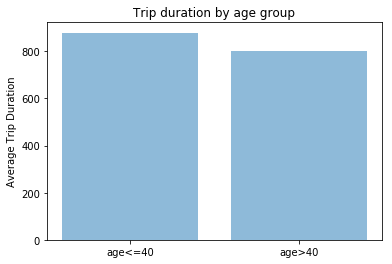

In [13]:
x = ['age<=40', 'age>40']
y = [young, old]
plt.bar(x, y, align='center', alpha=0.5)
plt.ylabel('Average Trip Duration')
plt.title('Trip duration by age group')
 
plt.show()

### Figure 1: Bar plot of average trip duration by age groups.  It can be seen that older people have smaller trip duration on average.